In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:

data = pd.read_csv('aggfile.csv')

data.drop('CUST_ID', axis=1, inplace=True)

data.fillna(method='ffill', inplace=True)

print(data.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

C:\Users\HP\AppData\Local\Temp\ipykernel_44904\639872102.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Normalize the data to unit norm
X_normalized = normalize(X_scaled)

# Convert to DataFrame for compatibility
X_normalized = pd.DataFrame(X_normalized)


In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Convert PCA result to DataFrame
X_pca = pd.DataFrame(X_pca, columns=['P1', 'P2'])


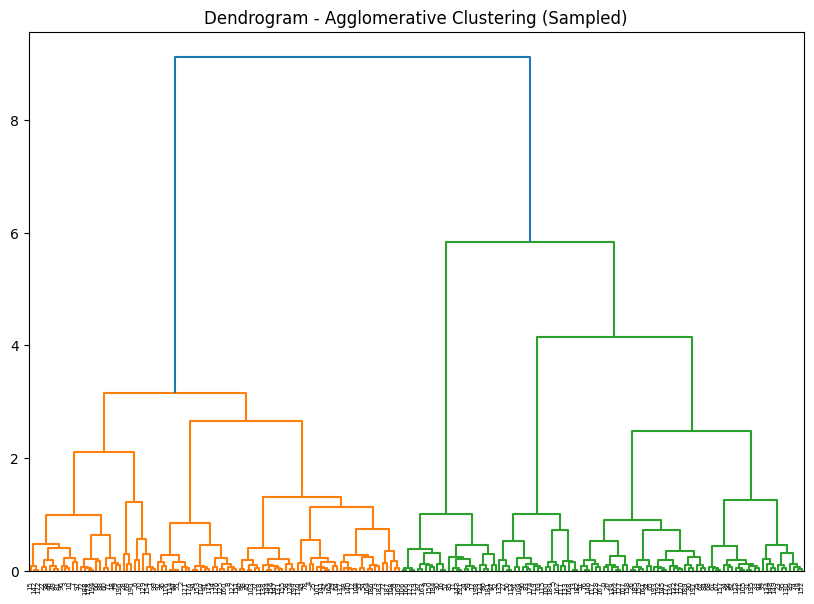

In [5]:
# plt.figure(figsize=(10, 7))
# plt.title('Dendrogram - Agglomerative Clustering')
# shc.dendrogram(shc.linkage(X_pca, method='ward'))
# plt.xlabel('Data Points')
# plt.ylabel('Distance')
# plt.show()
# Use only a subset for dendrogram visualization
sample_data = X_pca.sample(200, random_state=42)  # sample 200 points
plt.figure(figsize=(10, 7))
plt.title('Dendrogram - Agglomerative Clustering (Sampled)')
shc.dendrogram(shc.linkage(sample_data, method='ward'))
plt.show()



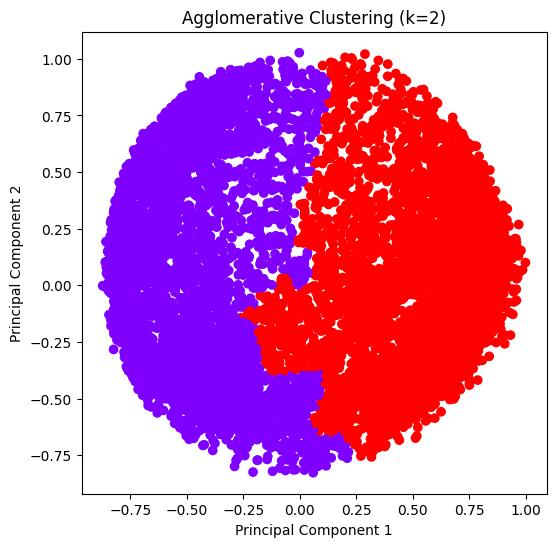

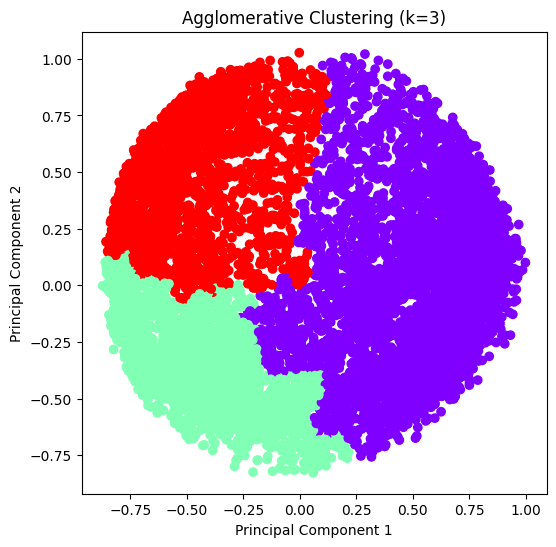

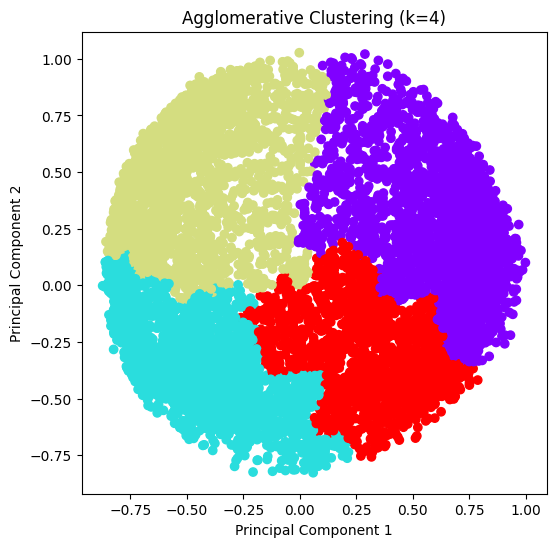

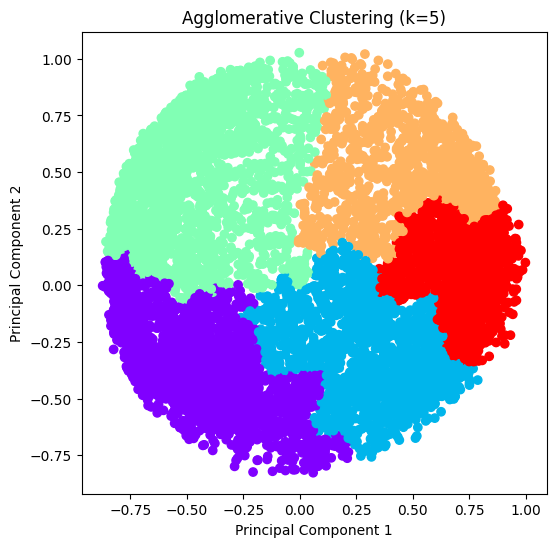

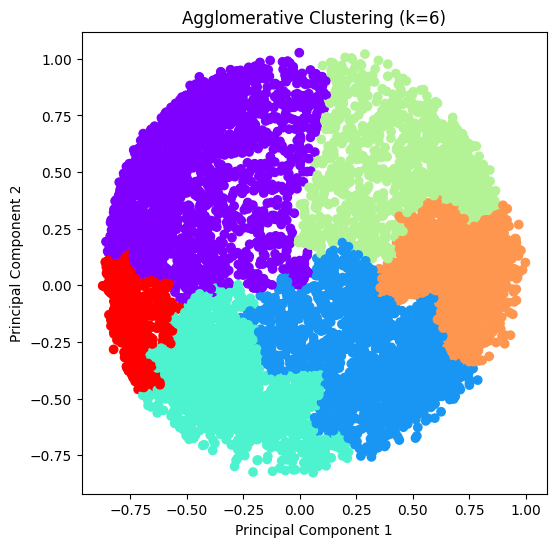

In [6]:
for k in range(2, 7):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_pca)

    plt.figure(figsize=(6, 6))
    plt.scatter(X_pca['P1'], X_pca['P2'], c=labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


In [ ]:
silhouette_scores = []

for k in range(2, 7):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score:.4f}')

# Plotting the scores
plt.figure(figsize=(8, 5))
plt.bar(range(2, 7), silhouette_scores, color='skyblue')
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Scores for Different k', fontsize=16)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

data = pd.read_csv('aggfile.csv')

data.drop('CUST_ID', axis=1, inplace=True)

data.fillna(method='ffill', inplace=True)

print(data.head())


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Normalize the data to unit norm
X_normalized = normalize(X_scaled)

# Convert to DataFrame for compatibility
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Convert PCA result to DataFrame
X_pca = pd.DataFrame(X_pca, columns=['P1', 'P2'])

plt.figure(figsize=(10, 7))
plt.title('Dendrogram - Agglomerative Clustering')
shc.dendrogram(shc.linkage(X_pca, method='ward'))
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


for k in range(2, 7):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_pca)

    plt.figure(figsize=(6, 6))
    plt.scatter(X_pca['P1'], X_pca['P2'], c=labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


silhouette_scores = []

for k in range(2, 7):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    print(f'Silhouette Score for k={k}: {score:.4f}')

# Plotting the scores
plt.figure(figsize=(8, 5))
plt.bar(range(2, 7), silhouette_scores, color='skyblue')
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Scores for Different k', fontsize=16)
plt.show()



